In [ ]:
# 메모리 뻥나면, 데이터를 분할!

# scikit 의 특징 : 잘 다룰려면 프로그램이 강점인 사람이 사용해야 좋다
- 메모리를 작게 사용하고, 처리속도를 빠르게 하기 위해서
- 차원감소 중점, 모델결합에 중점
- 일관성 있는 인터페이스
- 지속적으로 관리(모델 추가, 삭제)
- GPU를 사용하지 않음 (<-범용 모델로 만족: deep learning을 안한다)

- GPU -> TPU(HBM : => CPU를 묶어서 : AI시대 )

# - scikit object
- estimator
- predictor
- transformer
- Model :
     -PCR ( PCA+ Regression), 선형대수적 사고,
     
     -PLC R: 공분산으로 차원축소, 통계학적( 종속변수, 독립변수간의 공분산을 높게하는 방향으로 차원축소)


# Data Transformations
- 전처리(preprocessing)

# Feature extraction
- PCA, FA(factor analysis : 요인분석 : 상관관계가 높은 변수는 합해서 한개로: 재명명)

- Model training
    - train-test-split : 7:3
        - 성능평가, 과대적합을방지, 일반화성능을 높이기 위해서
        - tranin : 99 , test 77 => 과대적합 : 차원축소를 해야함
    - 편중을 방지하기 위해서 :Cross validtion(10개로 나누었다면 모두가 한번씩은 테스트에 참여할 수 있도록) =CV
    - Hyper parameter tuning :GridsearchCV
        - parameter 조합으로 테스트 - 가장 좋은 결과를 내는 변수조합을 탐색

# 회귀분석

### Classifier(분류) / Regressor(예측)
### 회귀
    ### 과적합이 문제 : Regularization ( 규제 )
    ### Lasso(L1), Ridge(L2), ElasticNet(L1 + L2)

### 분류
### 분류문제는 과소적합의 위험이 있다    
        ### RidgeClassifier 를 사용
        ### LogisticRegressor, SGDClassfier  Optimization: Graient Descent(경사하강법):
                점진적으로 조금씩 내려간다 : 기울기가 -가 되면 값을 +, 기울기가 +이면 - 해서 최적점을 찾아가는 학습법 -> 신경망에서 채택


In [227]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split #  데이터분할
# 일반화된 모델 : mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score # 평가  #mean_squared_error (실제값 - 에측값)**2, 결정계수r2_score
# 회귀분석 : 결정계수 구하기 : 회귀제곱합, 편차제곱합 => 총제곱합
#    회귀제곱합 / 총제곱합 = 결정계수
from sklearn import datasets, linear_model # 모델

diabetes_X, diabetes_y =datasets.load_diabetes(return_X_y=True)
diabetes_X.shape    # 10개의 변수
# 다중행렬: 독립변수가 여러개 y= ax+by+cz+ ...

(442, 10)

In [230]:
X_train, X_test, y_train, y_test=train_test_split(
    diabetes_X,diabetes_y, random_state=0)  # 나눌 때 랜덤하게 선택하라:seed값 주는것 임의로 바꾸어도 상관없음
regr= linear_model.LinearRegression()
regr.fit(X_train,y_train)   # 모델생성, 학습fit(선형회귀 모델)
diabetes_y_pred=regr.predict(X_test)    # 예측값, 학습 데이터 X_test를 이용해서 예측
print("Coeggicients:\n",regr.coef_)     # fit 하고 나서 의미가 있
print("Mean squared error : %.2f"% mean_squared_error(y_test, diabetes_y_pred))
# mean_squared_error 평균 제곱 오차: 예측값과 실제값의 평균제곱의 차이, 적을 수록 좋은 데이터
print("결정계수 : %.2f" % r2_score(y_test, diabetes_y_pred))        # 일반화 된것
regr.score(X_test,y_test)  # 모델에서 평가

Coeggicients:
 [ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
Mean squared error : 3180.16
결정계수 : 0.36


0.35940880381777085

In [232]:
regr.score(X_test,y_test)  # 모델에서 평가, 예측의 결정계수 평가(=예측모델의 적합도)

0.35940880381777085

In [236]:
# 비선형 회귀

x= np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y=np.array([1.0,0.8,0.9,0.1,-0.8,-1.0])
z=np.polyfit(x,y,3)  # 다항방정식= 계수 3개 , 절편 1개
z

array([ 0.04074074, -0.37698413,  0.46957672,  0.92063492])

In [237]:
# 비선형회귀 방법 PolynomailFeatures    데이터를 다차원으로(특성을 추가하여 더 유사한 데이터를 찾기위해,
                                    #   너무 많은 차원 추가시 과적합이 일어나므로 주의해야한다) 데이터 변형으로 해결
from sklearn.preprocessing import PolynomialFeatures
X= np.arange(6).reshape(3,2)
print(X)    #열 2개(=변수=특징)
# [1, a, b, a^2, ab, b^2]
poly=PolynomialFeatures(3)   # 3x10 비선형
poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [239]:
from sklearn.linear_model import Ridge  #L2 규제를 사용하는 회귀모델
from sklearn.pipeline import make_pipeline  # train/test : 전처리 : 데이터 처리과정을 묶어 놓은것 make_pipeline: 단방향으로 진행
# 전처리와 모델을 묶음
def f(x):
    return x*np.sin(x)  # 비선형

In [240]:
x_plot=np.linspace(0,10,100)
x=np.linspace(0,10,100)
rng=np.random.RandomState(0)
rng.shuffle(x)
x=np.sort(x[:20])   # 20개의 데이터
y=f(x)

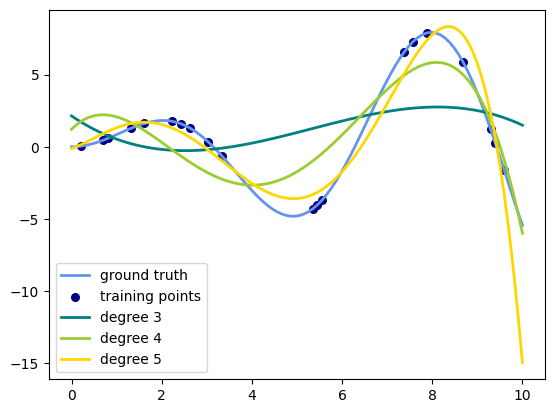

In [241]:
X=x[:,np.newaxis]   # 축증가    : 독립변수는 2차원으로 입력되어야 함
X_plot=x_plot[:,np.newaxis]
colors=['teal','yellowgreen','gold']
lw=2
plt.plot(x_plot,f(x_plot),color='cornflowerblue',linewidth=lw, label='ground truth')
# y 비선형으로 만든 데이터
plt.scatter(x,y,color='navy',s=30,marker='o',label='training points')
for count, degree in enumerate([3,4,5]): # 0:3, 1:4, 2:5    enumerate는 데이터에 순서
    # 3차원,4차원, 5차원으로 데이터를 비선형으로 확장
    model= make_pipeline(PolynomialFeatures(degree),Ridge())    # PolynomialFeatures 전처리, Ridge 모델을 묶음
            # 데이터가 통과하는 파이프 라인
    model.fit(X,y)
    y_plot=model.predict(X_plot)
    # 예측값에 대한 비선형 그래프
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw, label='degree %d'% degree)  # 카운트는 컬러값을 변경
plt.legend(loc='lower left')
plt.show()      # 5차원이 훈련데이터랑 가장 근접

In [243]:
model= make_pipeline(PolynomialFeatures(5),Ridge())
model.fit(X,y)
y_plot=model.predict(X_plot)

In [244]:
# 문제 ) 선형회귀 하시오  (LineaRegression)
X=[[0,0],[1,1],[2,2]]           # 독립변수
y=[0,1,2]                       # 종속변수
# # 회귀식을 작성하시오   y=ax+by+c
# model= make_pipeline(PolynomialFeatures(degree),Ridge())
# model.fit(X,y)
# c=model.predict(X)
# model.coef_
# #model.inter
reg=linear_model.LinearRegression() # class instance
reg.fit(X,y)
reg.coef_
reg.intercept_

1.1102230246251565e-16

In [42]:
x1=0
x2=0
y=reg.coef_[0]*x1+reg.coef_[1]*x2+reg.intercept_
y
# coef_ = 가중치

1.1102230246251565e-16

In [46]:
# 전처리
# scale(z점수 정규화) = (데이터 - 평균)/표준편차
# robust 정규화 = (데이터-median)/(3사분위수-1사분위수)
# minmax 정규화 = (data- min)/(max-min)
# maxabs_scale  = 부호를 인정해서 -1~1 사이의 값
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
import seaborn as sns
from sklearn.datasets import load_iris
iris=load_iris()
print(type(iris))
data1=iris.data # 독립변수 , 원래데이터
print(data1.shape)
data2=scale(iris.data)
print('전처리 전 평균:',np.mean(data1, axis=0))
print('전처리 전std:',np.std(data1,axis=0))
print('전처리 후 mean:',np.mean(data2, axis=0)) # 평균 0
print('전처리 후 std,',np.mean(data2,axis=0))   # 1

<class 'sklearn.utils._bunch.Bunch'>
(150, 4)
전처리 전 평균: [5.84333333 3.05733333 3.758      1.19933333]
전처리 전std: [0.82530129 0.43441097 1.75940407 0.75969263]
전처리 후 mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리 후 std, [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


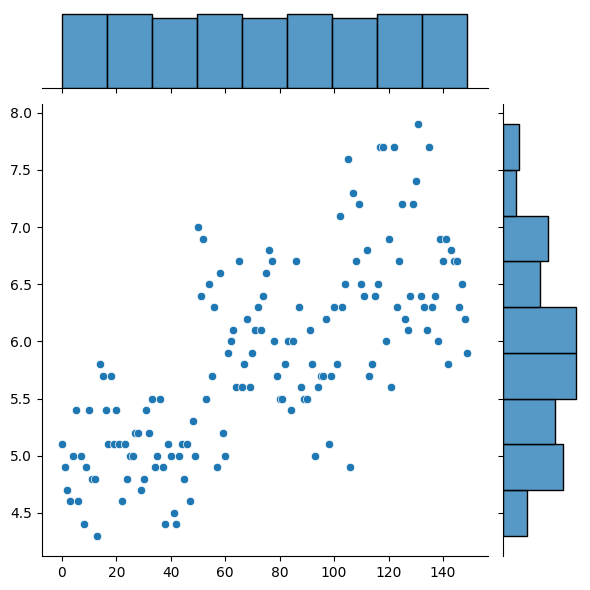

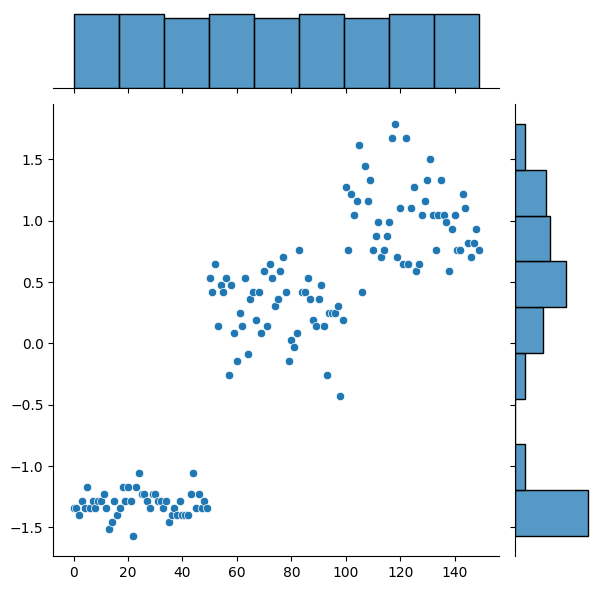

In [48]:
# scale 는 사이즈에만 영향을 미치고 분포에는 영향을 미치지 않는다
sns.jointplot(data1[:,0])
plt.show()
sns.jointplot(data2[:,2])
plt.show()

In [68]:
# StandardScaler == scale 연산방식은 동일
# scale 함수 , StandardScale 는 클래스
# 클래스라서 fit와 transform을 써줘야함
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data1)
data2=scaler.transform(data1)
print(data1.std(),data2.std())
data3=scaler.fit_transform(data1) # 정규화한 데이터
data3.std()

1.9738430577598278 1.0


1.0

In [ ]:
#data3
# 정규화한 데이터로 모델 생성 -> 예측
# 결과가 정규화된 데이터로 나옴
# 정규화된 데이터로 예측된 데이터를 원래의 값으로 복원해줘야 함

In [55]:
scaler.inverse_transform(data3) #원래의 데이터로 돌려줌
scaler.inverse_transform(data3).std()

1.9738430577598278

In [ ]:
# z점수를 내는 방식 =( 원래데이터 - 평균)/표준편차
(data3+data1.mean())*data1.std()

In [ ]:
(res+data1.min())*(data1.max()+data1.min())

In [245]:

data1=iris.data
minmax=MinMaxScaler()
res=minmax.fit_transform(data1)
res[0,:]

array([0.22222222, 0.625     , 0.06779661, 0.04166667])

In [ ]:
# result=res[0,:]
# minmax.inverse_transform([0.22222222, 0.625     , 0.06779661, 0.04166667])

In [78]:
from sklearn import preprocessing
X=[[1.,-1.,2.],
   [2.,0.,0.],
   [0.,1.,-1.]]
X_normalized=preprocessing.normalize(X, norm='l2')  # 피타고라스 정리 l2 , L1 절대값(x,y) 더한 값이 1이 되도록 정규화
X_normalized
# 벡터는 크기와 방향
# 벡터의 크기값은 피타고라스 size=np.sqrt(x**2+y**2+z**2)
# (x/size,y/size,z/size) : 방향만 남음, 값의범위는 -1 ~ 1
#    축

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [79]:
# Normalizer 클래스
normalizer= preprocessing.Normalizer().fit(X)
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [82]:
# 결측치 처리
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(missing_values=np.nan, strategy='median')    # 전략 : mean, most_frequency 최빈수, median
imp_mean.fit([[7,2,3],[4,np.nan,6],[10,5,9]])   # 열내 동질적이고 열간 이질적이기 때문에 채울때는 열로 보고 채워야함
X=[[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [84]:
# k nearest neighbor
# 상수, 평균, 중위값, 0 ,max , min 중 제일은 KNNImputer
from sklearn.impute import KNNImputer
# 거리값

# (1-3)**2+(2-4)**2

# [1, 2,  np.nan]
# [3, 4,  3]
# [np.nan,6,5]
# [8, 8,  7]

X=[[1,2,np.nan],[3,4,3],[np.nan,6,5],[8,8,7]]
imputer=KNNImputer(n_neighbors=2)   # 데이터에서 즉시 진행하고
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [ ]:
np.sqrt((1-5.5)**2+(6-2)**2)
np.sqrt((1-3)**2+(2-4)**2)
np.sqrt((1-8)**2(2-8)**2)

In [219]:
import pandas as pd
import numpy as np

# 문제 ) 결측치 처리
dict={'First':[100, 90, np.nan, 95],
      'Second':[30,45,56,np.nan],
      'Third':[np.nan,40,80,98]}
df=pd.DataFrame(dict)
df

,First,Second,Third
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [224]:
# 만약 NaN이 많을 때는 상수로 초기화(평균, 0)
# 채워나가면서
imp_mean=SimpleImputer(missing_values=np.nan,strategy='constant')
res=imp_mean.fit_transform(df)
res

array([[100.,  30.,   0.],
       [ 90.,  45.,  40.],
       [  0.,  56.,  80.],
       [ 95.,   0.,  98.]])

In [215]:
imputer=KNNImputer(n_neighbors=2)   # 5개가 디폴,   결측치 처리
df_filled=imputer.fit_transform(df)
df_filled

array([[100. ,  30. ,  69. ],
       [ 90. ,  45. ,  40. ],
       [ 97.5,  56. ,  80. ],
       [ 95. ,  43. ,  98. ]])

In [218]:
from scipy.spatial import distance
data=df_filled[:,:2]
distance_matrix = distance.cdist(data, data, 'euclidean')
distance_matrix

array([[ 0.        , 18.02775638, 26.11991577, 13.92838828],
       [18.02775638,  0.        , 13.31352696,  5.38516481],
       [26.11991577, 13.31352696,  0.        , 13.23820229],
       [13.92838828,  5.38516481, 13.23820229,  0.        ]])

In [90]:
import pandas as pd
import numpy as np
# boston data-> 사라짐
# boston 집값 예측 데이터
title =  ['RM','ZN','INDUS','CHAS', 'NOX','RM','AGE','RAD', 'TAX','PTRATIO','B', 'LSTAT', 'medv']
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(type(data))
boston_df = pd.DataFrame(data, columns = title)
boston_df.head()

<class 'numpy.ndarray'>


,RM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [92]:
boston_df.shape

(506, 13)

In [95]:
# z점수에 의한 이상치 제거
from scipy import stats
# z점수:표준 정규분포 곡선의 분위로 표현된 데이터
# 표준편차 : 표준편차의 몇 배수인가?
# 표준편차 1배수 : 68%
# 2배수 : 95%
# 3 : 99.7%
z=np.abs(stats.zscore(boston_df))   # z점수 => 없으면 0
print(z.shape)
threshold=3
print(np.where(z>3))    # 3보다

(506, 13)
(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1

In [97]:
# z점수 이용한 이상치 제거
boston_df=boston_df[(z<3).all(axis=1)]  # 열방향으로 가면서 ,데이터는 행이 됨
boston_df.shape

(415, 13)

In [ ]:
# IQR을 이용한 이상치 제거
Q1=boston_df.quantile(0.25)
Q3=boston_df.quantile(0.75)
IQR=Q3-Q1
print(IQR)
print(boston_df<(Q1-1.5*IQR))
print(boston_df>(Q3+1.5*IQR))

In [109]:
# 문제 ) IQR 방식으로 이상치를 제거한 데이터를 추출하시오
# 하나의 데이터에 대한 식만 돌리면 for문 돌려서 다 해줌
boston_df_out=boston_df[((boston_df>(Q1-1.5*IQR)) | (boston_df < (Q3+1.5*IQR)))]
boston_df_out.shape
boston_df_out

,RM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,NaN,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,NaN,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,NaN,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,NaN,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,NaN,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,NaN,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,NaN,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,NaN,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [248]:
# 문제) 다음 데이터에 대해서 z점수를 이용한 이상치 제거를 하시오
# 수식으로 해결
# (모든 데이터 - 평균)/ 표준편
# 3을 기준
data=[1,2,2,3,1,1,15,2,2,2,3,1,1,2]
data_ar=np.array(data)

data_arr=((data_ar-np.mean(data_ar))/np.std(data_ar))
print(np.where(data_arr>3))
data1=np.where(data_arr<3)
data2=data_ar[data1]
print('이상치가 제거된 값:',data2)

(array([6]),)
이상치가 제거된 값: [1 2 2 3 1 1 2 2 2 3 1 1 2]


In [135]:
# for 문을 이용한 방법
# z 점수가 평균 0+- 가 발생 하기에 abs사용

mean=np.mean(data)
std=np.std(data)
print('평균:',mean)
print('표준편차',std)

threshold=3  # 문지방( 경계선 )
outlier=[]
for i in data:
    z=(i-mean)/std
    if np.abs(z)> threshold:
        outlier.append(i)
print('데이터 이상치:',outlier)

평균: 2.7142857142857144
표준편차 3.4729273660409197
데이터 이상치: [15]


In [137]:
data=[1,2,2,3,1,1,15,2,2,2,3,1,1,2]
nd_data=np.array(data)
mean = np.mean(nd_data)
std=np.std(nd_data)
data_z=((nd_data-mean)/std)
index=np.where(np.abs(data_z)>3)
nd_data[index]

array([15])

In [138]:
data=[1,2,2,3,1,1,15,2,2,2,3,1,1,2]
data2=scale(data)   # scale 하면 리턴값은 ndarray
np.array(data)[np.abs(data2)>3]

array([15])

In [143]:
# 원핫인코딩  : 전처리 모델 class
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = np.array([[2], [3], [4], [2], [4]])
ohe.fit(X)
ohe.categories_ # 3개의 종류

[array([2, 3, 4])]

In [144]:
print(ohe.transform(X))

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (4, 2)	1.0


In [148]:
print(ohe.transform([X[0]]).toarray()) # 데이터 입력은 2차원으로

[[1. 0. 0.]]


In [151]:
ohe.inverse_transform([[1.,0. ,0.]])
# 원핫인코딩 : 범주형 데이터의 정규화 : 신경망에서는 반드시 해주어야 한다, accuracy 가 상승

array([[2]])

In [250]:
# 요소별 종류파악
ohe=OneHotEncoder()
X=np.array([[0,0,4],[1,1,0],[0,2,1],[1,0,2],[1,1,3]])
ohe.fit(X)
ohe.categories_

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3, 4])]

In [158]:
ohe.transform(X).toarray()
# 0 1 0 1 2 0 1 2 3 4
# 1 0 1 0 0 0 0 0 0 1
# 0 1 0 0 1 0 1 0 0 0
# 1 0 0 0 1 0 1 0 0 0


array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [160]:
ohe.inverse_transform([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2],
       [1, 1, 3]])

In [163]:
# 문제 ) 원핫인코딩
X=[['Male',1],['Female',2],['Female',3]]
ohe.fit(X)
ohe.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [166]:
ohe.transform(X).toarray()

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

In [168]:
ohe.inverse_transform([[0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

array([['Male', 1],
       ['Female', 2],
       ['Female', 3]], dtype=object)

In [173]:
# 레이블 범주화
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit([1,2,2,6])
le.fit([1,2,2,6,4])
le.classes_ # 정렬되고 중복을 제거
# 0 1 2 3   #번호를 매김
#[1,2,4,5]

array([1, 2, 4, 6])

In [175]:
le.transform([1,2,2,6])

array([0, 1, 1, 3])

In [177]:
le.inverse_transform([0,1,1,3])

array([1, 2, 2, 6])

In [181]:
# 딕트 벡터라이즈
from sklearn.feature_extraction import DictVectorizer
v=DictVectorizer(sparse=False)
# 단어 : foo, bar, baz..............sparse 메모리 낭비
#         2    1    1
# 학습데이터는 vector 화 해야
D=[{'foo':1,'bar':2},{'foo':3,'baz':1}]  # text mining
X=v.fit_transform(D)    # 벡터
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [183]:
v.feature_names_    # 열이름
# ['bar', 'baz', 'foo']
#   2       0       1
#   0       1       3

# 대수적으로 표현 (+-*/^)

['bar', 'baz', 'foo']

In [184]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [185]:
from pandas import DataFrame, Series
from itertools import cycle
area = '서울 부산 대구 인천 광주 대전 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주'.split()
college = '인문대학 사회과학대학 자연과학대학 간호대학 경영대학 공과대학 미술대학'.split()
gender = '남성 여성'.split()
fake_data = zip(range(100), cycle(area), cycle(college), cycle(gender)) # cycle 부족하면 반복되게, 가짜 데이터를 만드는 방법
hundred_students = DataFrame([data for num, *data in fake_data],
                              columns='지역 단과대 성별'.split())
hundred_students.head(10)

,지역,단과대,성별
0,서울,인문대학,남성
1,부산,사회과학대학,여성
2,대구,자연과학대학,남성
3,인천,간호대학,여성
4,광주,경영대학,남성
5,대전,공과대학,여성
6,울산,미술대학,남성
7,세종,인문대학,여성
8,경기,사회과학대학,남성
9,강원,자연과학대학,여성


In [187]:
college_one_got_encoded=pd.get_dummies(hundred_students.단과대)  # 여러 종류중 하나로 원핫인코딩, 지금은 단과대로
college_one_got_encoded

,간호대학,경영대학,공과대학,미술대학,사회과학대학,인문대학,자연과학대학
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
95,0,1,0,0,0,0,0
96,0,0,1,0,0,0,0
97,0,0,0,1,0,0,0
98,0,0,0,0,0,1,0


In [188]:
pd.get_dummies(hundred_students, prefix=['지역','단과대','성별']).head()

,지역_강원,지역_경기,지역_경남,지역_경북,지역_광주,지역_대구,지역_대전,지역_부산,지역_서울,지역_세종,...,지역_충북,단과대_간호대학,단과대_경영대학,단과대_공과대학,단과대_미술대학,단과대_사회과학대학,단과대_인문대학,단과대_자연과학대학,성별_남성,성별_여성
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [191]:
# 변수 선택법  : 과대 적합을 방지하기 위해
# 중요 변수 : 분산이 큰것이 중요한 변수
# SelectKbest, RFE(recursive feature eliminate)재귀적으로 반복
# 변수 선택 법
    # 병수중요도를 출력하는 모델을 중심한 모델 기준 : 트리모델(DT->RF,Ada,grdient Boost->XGBoost)
    # PCA 주성분 분석
    # feature_selection
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR # support vector machine
                            # 고차원을 좋아하는 모델 : 평면에 있는 데이터는 분류하기 힘들어
                            # kernel 함수 : 선형, 다차방정식, 가우시안 커널, logistic kernel
                            # supprot vector : 데이터의 최종위치를 연결한 선
                            # convex hull : 최외곽의 경계선을 연결한 선
X,y = make_friedman1(n_samples=50,n_features=5,random_state=0)  # 50x5
estimator=SVR(kernel='linear')  # regressor 회귀

selector=RFE(estimator) # 모델을 감싼 변수 선택기
selector=selector.fit(X,y)
selector.support_   # 5개의 변수 중 3개는 버리고 2개는 써라는 의미 => 변수평가  (기준: 분산)

array([False, False, False,  True,  True])

In [193]:
selector.ranking_ #변수 좋은 순서

array([3, 2, 4, 1, 1])

In [198]:
from sklearn.feature_selection import VarianceThreshold
X=[[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]]
sel=VarianceThreshold(threshold=(0.15)) # 0.15를 경계선으로 85% 중요도 평가 했을 시
# [      [0, 0, 1],
#        [0, 1, 0],
#        [1, 0, 0],
#        [0, 1, 1],
#        [0, 1, 0],
#        [0, 1, 1]]
# 첫 열이 사라짐
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [202]:
# noise 역할 하는 것들 제외
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X,y=load_iris(return_X_y=True)
print('원본',X.shape)
X_new=SelectKBest(chi2,k=2).fit_transform(X,y)  #기준 카이제곱값을 기준으로 두개의 변수만 남겨라
X_new.shape

원본 (150, 4)


(150, 2)